# Below is the task involving simple linear regression.I have used Scikit-learn(sklearn) package linear_model for training of data.We have to predict that how much percentage of marks a student is expected to score based upon the number of hours they studied.This is a Linear regression task which involves two variables one independent and one dependent variable or Target variable.

## CASE PROBLEM-WHAT WILL BE PREDICTED SCORE IF A STUDENT STUDY FOR 9.25 HRS IN A DAY?

Importing basic libraries for calculation and plotting

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [7]:
#Storing the data from a remote link in a variable
path='http://bit.ly/w-data'

Reading the data from pandas read method

In [8]:
data=pd.read_csv(path)

### Accessing Top Records using Head method

In [10]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Using shape attribute for inspecting the data in dataframe

In [11]:
data.shape

(25, 2)

#### USING INFO METHOD TO CHECK DATA TYPE AND NO. OF MISSING VALUES

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [15]:
#AS WE DONT HAVE ANY NULL VALUES IN VARIABLES AND NUMERICAL DATA TYPES ARE THERE IN BOTH VARIABLES


In [18]:
#SHOWING FIVE POINT SUMMARY USING DESCRIBE METHOD
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


#### PLOTTING LINEAR PLOT USING MATPLOTLIB LIBRARY TO CHECK CORRELATION BETWEEN THESE TWO VARIABLES

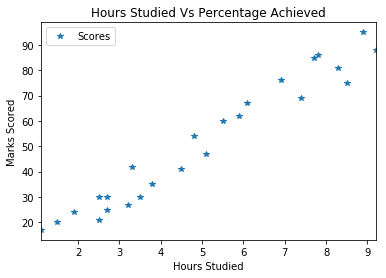

In [118]:
data.plot(x='Hours',y='Scores',kind='line',style='*')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title(label='Hours Studied Vs Percentage Achieved')
plt.show()

### AS WE SEE CLEARLY THERE EXISTS A POSITIVE LINEAR CORRELATION BETWEEN HOURS AND MARKS VARIABLE.

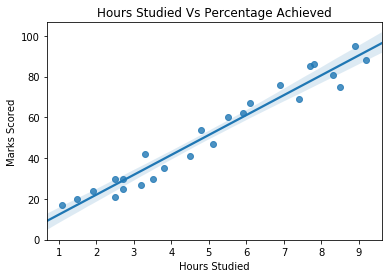

In [42]:
#PLOTTING REG PLOT USING SEABORN LIBRARY

sns.regplot(x=data.Hours,y=data.Scores,data=data )
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title(label='Hours Studied Vs Percentage Achieved')
plt.show()

# PREPARING THE DATA FOR TESTING AND TRAINING

In [54]:
# DIVIDING THE DATA INTO INDEPENDENT AND TARGET VARIABLE

In [87]:
X = data.iloc[:,:1].values
Y = data.loc[:, 'Scores'].values

In [88]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [89]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#  SPLITTING THE DATA USING SCIKIT LEARNS TRAIN_TEST_SPLIT() METHOD

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

# TRAINING OF ALGORITHM

In [78]:
# We use linear regression model from scikit learns package for model training purposes
from sklearn.linear_model import LinearRegression

In [82]:
Lin_reg=LinearRegression()
Lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
print('Training of model is now complete')

Training of model is now complete


# PLOTTING THE REGRESSION LINE

In [97]:
regressor_line=Lin_reg.coef_*X+Lin_reg.intercept_

In [98]:
regressor_line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

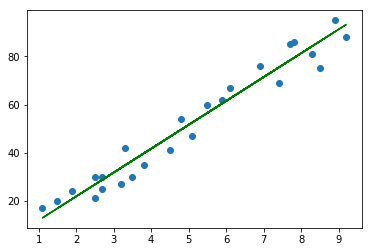

In [102]:
#plotting for Test data
plt.scatter(X,Y)
plt.plot(X,regressor_line,color='green')
plt.show()

In [103]:
#ACCESSING INTERCEPT AND COEFFICIENT

In [108]:
print('COEFFIECIENT IS:-\n',Lin_reg.coef_)

COEFFIECIENT IS:-
 [9.91065648]


In [110]:
print('Intercept is:-\n',Lin_reg.intercept_)

Intercept is:-
 2.018160041434683


#### TRAINING AND TEST DATA SCORES

In [113]:
print('Training data score:\n',Lin_reg.score(X_train,Y_train))

Training score:
 0.9515510725211553


In [114]:
print('Test data score:\n',Lin_reg.score(X_test,Y_test))

Test data score:
 0.9454906892105356


#### DOING PREDICTIONS ON INDEPENDENT VARIABLE

In [116]:
Y_predict=Lin_reg.predict(X_test)

In [119]:
Y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Y_predict gives the predicted values in form of numpy array for every value in X_test variable

In [117]:
#COMPARING ACTUAL TEST OUTPUT VALUES VS PREDICTED VALUES USING PANDAS DATAFRAME
pd.DataFrame({'Actual':Y_test,'Predicted':Y_predict})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Now lets visualise the actual and predicted values using scatter plots

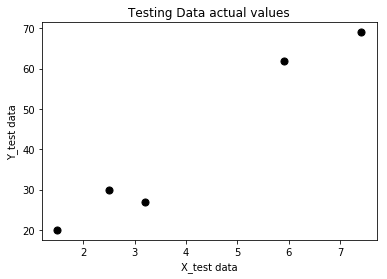

In [121]:
plt.scatter(x=X_test,y=Y_test,s=50,c='black',marker='o')
plt.title('Testing Data actual values')
plt.xlabel('X_test data')
plt.ylabel('Y_test data')
plt.show()

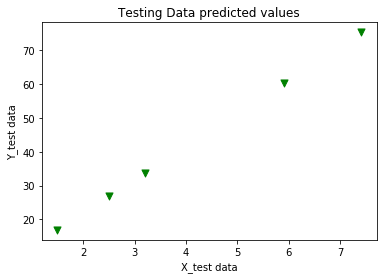

In [124]:
plt.scatter(x=X_test,y=Y_predict,s=50,c='green',marker='v')
plt.title('Testing Data predicted values')
plt.xlabel('X_test data')
plt.ylabel('Y_test data')
plt.show()

## Checking manually the predicted scores

In [135]:
hours=9.25
print('The percent marks of student who studied for' +' '  +str(hours)+ ' ' + 'Hours are ',Lin_reg.predict([[hours]]))


The percent marks of student who studied for 9.25 Hours are  [93.69173249]


## EVALUATION OF MODEL

*FOR REGRESSION ALGORITHMS THREE METRICS ARE USED TO COMPARE THE PERFORMANCE OF ALGORITHM*

1.**MEAN ABSOLUTE ERROR**

2.**MEAN SQUARE ERROR**

3.**ROOT MEAN SQUARE ERROR**

In [136]:
#IMPORTING METRICS FROM SCIKIT'S-LEARN PACKAGE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [139]:
mean_sq_error=mean_squared_error(Y_test,Y_predict)
mean_abs_error=mean_absolute_error(Y_test,Y_predict)
rms_error=np.sqrt(mean_squared_error(Y_test,Y_predict))

In [140]:
print('Mean square error is:\n',mean_sq_error)
print('Mean absolute error is:\n',mean_abs_error)
print('root Mean Square error is:\n',rms_error)


Mean square error is:
 21.5987693072174
Mean absolute error is:
 4.183859899002975
root Mean Square error is:
 4.6474476121003665
